In [1]:
import os, sys
sys.path.append('../SoSeq-segment')
from utils.io import *

In [2]:
data_directory = 'data_cropped/'
video_lenghts = get_video_lengths(data_directory)

In [3]:
## Load 10 random frames from each video

In [6]:
frames = []
frame_labels = []
for video,length in video_lenghts.items():
    print(video)
    for i in np.random.randint(0,length,10):
        d = read_depth_frames16(data_directory+video.replace('color.mp4','depth.avi'), [i], frame_size=(540,480)).squeeze()
        frames.append(d)
        frame_labels.append((video,i))

19_11_30-GRIN3-MB.000371392012_color.mp4
19_12_1-C57_GRIN5-solo.000371392012_color.mp4
19_11_21-C57_GRIN3-MK-000371392012_color.mp4
19_11_25-C57_GRIN5-MB-000371392012_color.mp4
19_11_26-C57_GRIN3-MG-000371392012_color.mp4
19_12_2-C57_GRIN5-solo.000371392012_color.mp4
19_11_24-C57_GRIN5-solo-000371392012_color.mp4
19_11_21-C57_GRIN5-MG-000371392012_color.mp4
19_12_2-C57_GRIN3-solo.000371392012_color.mp4
19_11_19-C57_GRIN3-MR-000371392012_color.mp4
19_12_3-C57_GRIN3-MR.000371392012_color.mp4
19_12_1-C57_GRIN3-solo.000371392012_color.mp4
19_11_30-GRIN5-MK.000371392012_color.mp4
19_11_27-GRIN3-MK.000371392012_color.mp4
19_11_26-C57_GRIN5-MR-000371392012_color.mp4
19_11_19-C57_GRIN5-MB-000371392012_color.mp4
19_11_23-C57_GRIN5-solo-000371392012_color.mp4
19_11_23-C57_GRIN3-solo-000371392012_color.mp4
19_11_20-C57_GRIN5-MR-000371392012_color.mp4
19_11_24-C57_GRIN3-solo-000371392012_color.mp4
19_11_25-C57_GRIN3-MR-000371392012_color.mp4
19_11_22-C57_GRIN5-MK-000371392012_color.mp4
19_11_24-MB

In [7]:
import matplotlib.pyplot as plt

In [8]:
MAX_DISTANCE = 1000
MIN_DISTANCE = 10


In [9]:
all_depth_values = np.hstack([d.flatten() for d in frames])

(10, 1000)

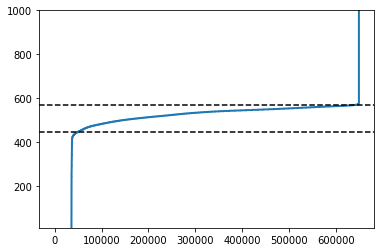

In [10]:

min_distance_detected = np.percentile(all_depth_values[all_depth_values>MIN_DISTANCE],2)
max_distance_detected = np.percentile(all_depth_values[all_depth_values<MAX_DISTANCE],99)

plt.plot(sorted(all_depth_values[::100]), linewidth=2)
plt.axhline(min_distance_detected,c='k',linestyle='--')
plt.axhline(max_distance_detected,c='k',linestyle='--')
plt.ylim([MIN_DISTANCE, MAX_DISTANCE])

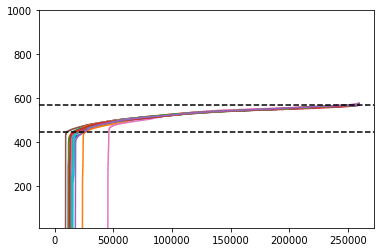

In [11]:
import matplotlib.pyplot as plt
for f in frames[::10]:   
    plt.plot(sorted(f.flatten()))
plt.ylim([MIN_DISTANCE, MAX_DISTANCE])
plt.axhline(min_distance_detected,c='k',linestyle='--')
plt.axhline(max_distance_detected,c='k',linestyle='--')

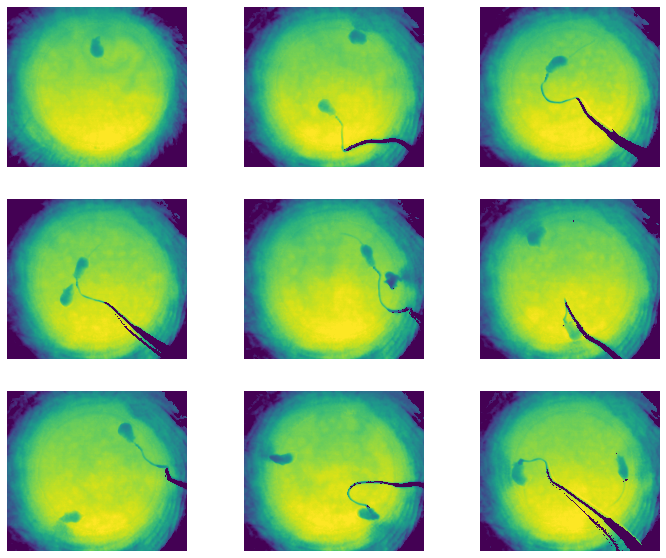

In [12]:
fig,axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        k = np.random.randint(0,len(frames))
        axs[i,j].imshow(frames[k], vmin=min_distance_detected, vmax=max_distance_detected)
        axs[i,j].axis('off')
fig.set_size_inches((12,10))

In [ ]:

depth_pipe = None
for k,l in video_lenghts.items():
    if not os.path.exists(data_directory+'/'+k.replace('color.mp4','depth_.avi')):
        os.system('mv '+data_directory+'/'+k.replace('color.mp4','depth.avi')+' '+data_directory+'/'+k.replace('color.mp4','depth_.avi'))
    
    for frame in range(0,l,100):
        dd = read_depth_frames16(data_directory+'/'+k.replace('color.mp4','depth_.avi'), range(frame,np.min([frame+100,l])), frame_size=(540,480))
        dd = dd.astype(float) - min_distance_detected
        if (max_distance_detected - min_distance_detected) > 255:
            dd = dd / (max_distance_detected - min_distance_detected)  * 255
        dd = np.minimum(dd,255)
        depth_pipe = write_depth_frames8('data_cropped/'+k.replace('color.mp4','depth.avi'),
                                        dd, 
                                        pipe=depth_pipe, 
                                        close_pipe=False, fps=30)
        
        print(k,frame)

depth_pipe.stdin.close()


19_11_30-GRIN3-MB.000371392012_color.mp4 0
19_11_30-GRIN3-MB.000371392012_color.mp4 100
19_11_30-GRIN3-MB.000371392012_color.mp4 200
19_11_30-GRIN3-MB.000371392012_color.mp4 300
19_11_30-GRIN3-MB.000371392012_color.mp4 400
19_11_30-GRIN3-MB.000371392012_color.mp4 500
19_11_30-GRIN3-MB.000371392012_color.mp4 600
19_11_30-GRIN3-MB.000371392012_color.mp4 700
19_11_30-GRIN3-MB.000371392012_color.mp4 800
19_11_30-GRIN3-MB.000371392012_color.mp4 900
19_11_30-GRIN3-MB.000371392012_color.mp4 1000
19_11_30-GRIN3-MB.000371392012_color.mp4 1100
19_11_30-GRIN3-MB.000371392012_color.mp4 1200
19_11_30-GRIN3-MB.000371392012_color.mp4 1300
19_11_30-GRIN3-MB.000371392012_color.mp4 1400
19_11_30-GRIN3-MB.000371392012_color.mp4 1500
19_11_30-GRIN3-MB.000371392012_color.mp4 1600
19_11_30-GRIN3-MB.000371392012_color.mp4 1700
19_11_30-GRIN3-MB.000371392012_color.mp4 1800
19_11_30-GRIN3-MB.000371392012_color.mp4 1900
19_11_30-GRIN3-MB.000371392012_color.mp4 2000
19_11_30-GRIN3-MB.000371392012_color.mp4 2100


19_11_30-GRIN3-MB.000371392012_color.mp4 17700
19_11_30-GRIN3-MB.000371392012_color.mp4 17800
19_11_30-GRIN3-MB.000371392012_color.mp4 17900
19_11_30-GRIN3-MB.000371392012_color.mp4 18000
19_11_30-GRIN3-MB.000371392012_color.mp4 18100
19_11_30-GRIN3-MB.000371392012_color.mp4 18200
19_11_30-GRIN3-MB.000371392012_color.mp4 18300
19_11_30-GRIN3-MB.000371392012_color.mp4 18400
19_11_30-GRIN3-MB.000371392012_color.mp4 18500
19_11_30-GRIN3-MB.000371392012_color.mp4 18600
19_11_30-GRIN3-MB.000371392012_color.mp4 18700
19_11_30-GRIN3-MB.000371392012_color.mp4 18800
19_11_30-GRIN3-MB.000371392012_color.mp4 18900
19_11_30-GRIN3-MB.000371392012_color.mp4 19000
19_11_30-GRIN3-MB.000371392012_color.mp4 19100
19_11_30-GRIN3-MB.000371392012_color.mp4 19200
19_11_30-GRIN3-MB.000371392012_color.mp4 19300
19_11_30-GRIN3-MB.000371392012_color.mp4 19400
19_11_30-GRIN3-MB.000371392012_color.mp4 19500
19_11_30-GRIN3-MB.000371392012_color.mp4 19600
19_11_30-GRIN3-MB.000371392012_color.mp4 19700
19_11_30-GRIN

19_11_30-GRIN3-MB.000371392012_color.mp4 35200
19_11_30-GRIN3-MB.000371392012_color.mp4 35300
19_11_30-GRIN3-MB.000371392012_color.mp4 35400
19_11_30-GRIN3-MB.000371392012_color.mp4 35500
19_11_30-GRIN3-MB.000371392012_color.mp4 35600
19_11_30-GRIN3-MB.000371392012_color.mp4 35700
19_11_30-GRIN3-MB.000371392012_color.mp4 35800
19_11_30-GRIN3-MB.000371392012_color.mp4 35900
19_11_30-GRIN3-MB.000371392012_color.mp4 36000
19_11_30-GRIN3-MB.000371392012_color.mp4 36100
19_11_30-GRIN3-MB.000371392012_color.mp4 36200
19_11_30-GRIN3-MB.000371392012_color.mp4 36300
19_11_30-GRIN3-MB.000371392012_color.mp4 36400
19_11_30-GRIN3-MB.000371392012_color.mp4 36500
19_11_30-GRIN3-MB.000371392012_color.mp4 36600
19_11_30-GRIN3-MB.000371392012_color.mp4 36700
19_11_30-GRIN3-MB.000371392012_color.mp4 36800
19_11_30-GRIN3-MB.000371392012_color.mp4 36900
19_11_30-GRIN3-MB.000371392012_color.mp4 37000
19_11_30-GRIN3-MB.000371392012_color.mp4 37100
19_11_30-GRIN3-MB.000371392012_color.mp4 37200
19_11_30-GRIN

19_11_30-GRIN3-MB.000371392012_color.mp4 52700
19_11_30-GRIN3-MB.000371392012_color.mp4 52800
19_11_30-GRIN3-MB.000371392012_color.mp4 52900
19_11_30-GRIN3-MB.000371392012_color.mp4 53000
19_11_30-GRIN3-MB.000371392012_color.mp4 53100
19_11_30-GRIN3-MB.000371392012_color.mp4 53200
19_11_30-GRIN3-MB.000371392012_color.mp4 53300
19_11_30-GRIN3-MB.000371392012_color.mp4 53400
19_11_30-GRIN3-MB.000371392012_color.mp4 53500
19_11_30-GRIN3-MB.000371392012_color.mp4 53600
19_11_30-GRIN3-MB.000371392012_color.mp4 53700
19_11_30-GRIN3-MB.000371392012_color.mp4 53800
19_11_30-GRIN3-MB.000371392012_color.mp4 53900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 0
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 600
19_12_1-C57_GRIN5-solo.000371392012_color

19_12_1-C57_GRIN5-solo.000371392012_color.mp4 14800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 14900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15600
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15700
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 15900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 16600
19_12_1-C57_

19_12_1-C57_GRIN5-solo.000371392012_color.mp4 30600
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 30700
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 30800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 30900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31600
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31700
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 31900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 32000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 32100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 32200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 32300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 32400
19_12_1-C57_

19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46600
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46700
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 46900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47200
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47300
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47400
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47500
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47600
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47700
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47800
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 47900
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 48000
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 48100
19_12_1-C57_GRIN5-solo.000371392012_color.mp4 48200
19_12_1-C57_

19_11_21-C57_GRIN3-MK-000371392012_color.mp4 8600
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 8700
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 8800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 8900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9500
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9600
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9700
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 9900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 10000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 10100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 10200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 10300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 10400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 

19_11_21-C57_GRIN3-MK-000371392012_color.mp4 24700
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 24800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 24900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25500
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25600
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25700
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 25900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 26500
19_11_21-C57_GRIN3-MK-000371392

19_11_21-C57_GRIN3-MK-000371392012_color.mp4 40800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 40900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41500
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41600
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41700
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41800
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 41900
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42000
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42100
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42200
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42300
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42400
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42500
19_11_21-C57_GRIN3-MK-000371392012_color.mp4 42600
19_11_21-C57_GRIN3-MK-000371392

19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 3900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 4900


19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 19900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 20900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 21000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 21100
19_11_25-C57_GRIN5-MB-000371392

19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 35900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 36900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 37000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 37100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 37200
19_11_25-C57_GRIN5-MB-000371392

19_11_25-C57_GRIN5-MB-000371392012_color.mp4 51500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 51600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 51700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 51800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 51900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52300
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52400
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52500
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52600
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52700
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52800
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 52900
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 53000
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 53100
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 53200
19_11_25-C57_GRIN5-MB-000371392012_color.mp4 53300
19_11_25-C57_GRIN5-MB-000371392

19_11_26-C57_GRIN3-MG-000371392012_color.mp4 13800
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 13900
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14600
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14700
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14800
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 14900
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 15600
19_11_26-C57_GRIN3-MG-000371392

19_11_26-C57_GRIN3-MG-000371392012_color.mp4 29900
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30600
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30700
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30800
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 30900
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31600
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 31700
19_11_26-C57_GRIN3-MG-000371392

19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46600
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46700
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46800
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 46900
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47000
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47100
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47200
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47300
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47400
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47500
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47600
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47700
19_11_26-C57_GRIN3-MG-000371392012_color.mp4 47800
19_11_26-C57_GRIN3-MG-000371392

19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8500
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8600
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8700
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8800
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 8900
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9000
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9500
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9600
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9700
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9800
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 9900
19_12_2-C57_GRIN5-solo.00037139

19_12_2-C57_GRIN5-solo.000371392012_color.mp4 23900
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24000
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24500
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24600
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24700
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24800
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 24900
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25000
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25500
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25600
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 25700
19_12_2-C57_

19_12_2-C57_GRIN5-solo.000371392012_color.mp4 39700
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 39800
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 39900
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40000
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40500
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40600
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40700
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40800
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 40900
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41000
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41100
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41200
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41300
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41400
19_12_2-C57_GRIN5-solo.000371392012_color.mp4 41500
19_12_2-C57_

19_11_24-C57_GRIN5-solo-000371392012_color.mp4 1500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 1600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 1700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 1800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 1900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 2900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 3000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 3100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 3200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 3300
19_11_24-C57

19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 17900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 18900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4

19_11_24-C57_GRIN5-solo-000371392012_color.mp4 32700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 32800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 32900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 33900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 34000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 34100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 34200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 34300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 34400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4

19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 48900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49000
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49100
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49200
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49300
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49400
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49500
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49600
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49700
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49800
19_11_24-C57_GRIN5-solo-000371392012_color.mp4 49900
19_11_24-C57_GRIN5-solo-000371392012_color.mp4

19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10300
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10400
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 10900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11100
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11200
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11300
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11400
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 11900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 12000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 12100
19_11_21-C57_GRIN5-MG-000371392

19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26400
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 26900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27100
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27200
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27300
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27400
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 27900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 28000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 28100
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 28200
19_11_21-C57_GRIN5-MG-000371392

19_11_21-C57_GRIN5-MG-000371392012_color.mp4 42500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 42600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 42700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 42800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 42900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43100
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43200
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43300
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43400
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43500
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43600
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43700
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43800
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 43900
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 44000
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 44100
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 44200
19_11_21-C57_GRIN5-MG-000371392012_color.mp4 44300
19_11_21-C57_GRIN5-MG-000371392

19_12_2-C57_GRIN3-solo.000371392012_color.mp4 4600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 4700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 4800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 4900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 5900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 6000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 6100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 6200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 6300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 6400
19_12_2-C57_GRIN3-solo.00037139

19_12_2-C57_GRIN3-solo.000371392012_color.mp4 20500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 20600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 20700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 20800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 20900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 21900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 22000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 22100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 22200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 22300
19_12_2-C57_

19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 36900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 37900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 38000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 38100
19_12_2-C57_

19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 52900
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53000
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53100
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53200
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53300
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53400
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53500
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53600
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53700
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53800
19_12_2-C57_GRIN3-solo.000371392012_color.mp4 53900
19_11_19-C57

19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14400
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14500
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 14900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15200
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15300
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15400
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15500
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 15900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 16000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 16100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 16200
19_11_19-C57_GRIN3-MR-000371392

19_11_19-C57_GRIN3-MR-000371392012_color.mp4 30500
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 30600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 30700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 30800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 30900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31200
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31300
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31400
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31500
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 31900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 32000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 32100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 32200
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 32300
19_11_19-C57_GRIN3-MR-000371392

19_11_19-C57_GRIN3-MR-000371392012_color.mp4 46600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 46700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 46800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 46900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47200
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47300
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47400
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47500
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47600
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47700
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47800
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 47900
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 48000
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 48100
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 48200
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 48300
19_11_19-C57_GRIN3-MR-000371392012_color.mp4 48400
19_11_19-C57_GRIN3-MR-000371392

19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9500
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 9900
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10000
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10500
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 10900
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 11000
19_12_3-C

19_12_3-C57_GRIN3-MR.000371392012_color.mp4 25600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 25700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 25800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 25900
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26000
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26500
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 26900
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27000
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 27500


19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42000
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42500
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 42900
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43000
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43100
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43200
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43300
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43400
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43500
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43600
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43700
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43800
19_12_3-C57_GRIN3-MR.000371392012_color.mp4 43900


19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 4900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 5900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 6000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 6100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 6200
19_12_1-C57_GRIN3-solo.00037139

19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 20900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 21900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 22000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 22100
19_12_1-C57_

19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 36900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 37900
19_12_1-C57_

19_12_1-C57_GRIN3-solo.000371392012_color.mp4 51900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52700
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52800
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 52900
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53000
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53100
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53200
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53300
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53400
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53500
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53600
19_12_1-C57_GRIN3-solo.000371392012_color.mp4 53700
19_12_1-C57_

19_11_30-GRIN5-MK.000371392012_color.mp4 15400
19_11_30-GRIN5-MK.000371392012_color.mp4 15500
19_11_30-GRIN5-MK.000371392012_color.mp4 15600
19_11_30-GRIN5-MK.000371392012_color.mp4 15700
19_11_30-GRIN5-MK.000371392012_color.mp4 15800
19_11_30-GRIN5-MK.000371392012_color.mp4 15900
19_11_30-GRIN5-MK.000371392012_color.mp4 16000
19_11_30-GRIN5-MK.000371392012_color.mp4 16100
19_11_30-GRIN5-MK.000371392012_color.mp4 16200
19_11_30-GRIN5-MK.000371392012_color.mp4 16300
19_11_30-GRIN5-MK.000371392012_color.mp4 16400
19_11_30-GRIN5-MK.000371392012_color.mp4 16500
19_11_30-GRIN5-MK.000371392012_color.mp4 16600
19_11_30-GRIN5-MK.000371392012_color.mp4 16700
19_11_30-GRIN5-MK.000371392012_color.mp4 16800
19_11_30-GRIN5-MK.000371392012_color.mp4 16900
19_11_30-GRIN5-MK.000371392012_color.mp4 17000
19_11_30-GRIN5-MK.000371392012_color.mp4 17100
19_11_30-GRIN5-MK.000371392012_color.mp4 17200
19_11_30-GRIN5-MK.000371392012_color.mp4 17300
19_11_30-GRIN5-MK.000371392012_color.mp4 17400
19_11_30-GRIN

19_11_30-GRIN5-MK.000371392012_color.mp4 32900
19_11_30-GRIN5-MK.000371392012_color.mp4 33000
19_11_30-GRIN5-MK.000371392012_color.mp4 33100
19_11_30-GRIN5-MK.000371392012_color.mp4 33200
19_11_30-GRIN5-MK.000371392012_color.mp4 33300
19_11_30-GRIN5-MK.000371392012_color.mp4 33400
19_11_30-GRIN5-MK.000371392012_color.mp4 33500
19_11_30-GRIN5-MK.000371392012_color.mp4 33600
19_11_30-GRIN5-MK.000371392012_color.mp4 33700
19_11_30-GRIN5-MK.000371392012_color.mp4 33800
19_11_30-GRIN5-MK.000371392012_color.mp4 33900
19_11_30-GRIN5-MK.000371392012_color.mp4 34000
19_11_30-GRIN5-MK.000371392012_color.mp4 34100
19_11_30-GRIN5-MK.000371392012_color.mp4 34200
19_11_30-GRIN5-MK.000371392012_color.mp4 34300
19_11_30-GRIN5-MK.000371392012_color.mp4 34400
19_11_30-GRIN5-MK.000371392012_color.mp4 34500
19_11_30-GRIN5-MK.000371392012_color.mp4 34600
19_11_30-GRIN5-MK.000371392012_color.mp4 34700
19_11_30-GRIN5-MK.000371392012_color.mp4 34800
19_11_30-GRIN5-MK.000371392012_color.mp4 34900
19_11_30-GRIN

19_11_30-GRIN5-MK.000371392012_color.mp4 50400
19_11_30-GRIN5-MK.000371392012_color.mp4 50500
19_11_30-GRIN5-MK.000371392012_color.mp4 50600
19_11_30-GRIN5-MK.000371392012_color.mp4 50700
19_11_30-GRIN5-MK.000371392012_color.mp4 50800
19_11_30-GRIN5-MK.000371392012_color.mp4 50900
19_11_30-GRIN5-MK.000371392012_color.mp4 51000
19_11_30-GRIN5-MK.000371392012_color.mp4 51100
19_11_30-GRIN5-MK.000371392012_color.mp4 51200
19_11_30-GRIN5-MK.000371392012_color.mp4 51300
19_11_30-GRIN5-MK.000371392012_color.mp4 51400
19_11_30-GRIN5-MK.000371392012_color.mp4 51500
19_11_30-GRIN5-MK.000371392012_color.mp4 51600
19_11_30-GRIN5-MK.000371392012_color.mp4 51700
19_11_30-GRIN5-MK.000371392012_color.mp4 51800
19_11_30-GRIN5-MK.000371392012_color.mp4 51900
19_11_30-GRIN5-MK.000371392012_color.mp4 52000
19_11_30-GRIN5-MK.000371392012_color.mp4 52100
19_11_30-GRIN5-MK.000371392012_color.mp4 52200
19_11_30-GRIN5-MK.000371392012_color.mp4 52300
19_11_30-GRIN5-MK.000371392012_color.mp4 52400
19_11_30-GRIN

19_11_27-GRIN3-MK.000371392012_color.mp4 14300
19_11_27-GRIN3-MK.000371392012_color.mp4 14400
19_11_27-GRIN3-MK.000371392012_color.mp4 14500
19_11_27-GRIN3-MK.000371392012_color.mp4 14600
19_11_27-GRIN3-MK.000371392012_color.mp4 14700
19_11_27-GRIN3-MK.000371392012_color.mp4 14800
19_11_27-GRIN3-MK.000371392012_color.mp4 14900
19_11_27-GRIN3-MK.000371392012_color.mp4 15000
19_11_27-GRIN3-MK.000371392012_color.mp4 15100
19_11_27-GRIN3-MK.000371392012_color.mp4 15200
19_11_27-GRIN3-MK.000371392012_color.mp4 15300
19_11_27-GRIN3-MK.000371392012_color.mp4 15400
19_11_27-GRIN3-MK.000371392012_color.mp4 15500
19_11_27-GRIN3-MK.000371392012_color.mp4 15600
19_11_27-GRIN3-MK.000371392012_color.mp4 15700
19_11_27-GRIN3-MK.000371392012_color.mp4 15800
19_11_27-GRIN3-MK.000371392012_color.mp4 15900
19_11_27-GRIN3-MK.000371392012_color.mp4 16000
19_11_27-GRIN3-MK.000371392012_color.mp4 16100
19_11_27-GRIN3-MK.000371392012_color.mp4 16200
19_11_27-GRIN3-MK.000371392012_color.mp4 16300
19_11_27-GRIN

19_11_27-GRIN3-MK.000371392012_color.mp4 31800
19_11_27-GRIN3-MK.000371392012_color.mp4 31900
19_11_27-GRIN3-MK.000371392012_color.mp4 32000
19_11_27-GRIN3-MK.000371392012_color.mp4 32100
19_11_27-GRIN3-MK.000371392012_color.mp4 32200
19_11_27-GRIN3-MK.000371392012_color.mp4 32300
19_11_27-GRIN3-MK.000371392012_color.mp4 32400
19_11_27-GRIN3-MK.000371392012_color.mp4 32500
19_11_27-GRIN3-MK.000371392012_color.mp4 32600
19_11_27-GRIN3-MK.000371392012_color.mp4 32700
19_11_27-GRIN3-MK.000371392012_color.mp4 32800
19_11_27-GRIN3-MK.000371392012_color.mp4 32900
19_11_27-GRIN3-MK.000371392012_color.mp4 33000
19_11_27-GRIN3-MK.000371392012_color.mp4 33100
19_11_27-GRIN3-MK.000371392012_color.mp4 33200
19_11_27-GRIN3-MK.000371392012_color.mp4 33300
19_11_27-GRIN3-MK.000371392012_color.mp4 33400
19_11_27-GRIN3-MK.000371392012_color.mp4 33500
19_11_27-GRIN3-MK.000371392012_color.mp4 33600
19_11_27-GRIN3-MK.000371392012_color.mp4 33700
19_11_27-GRIN3-MK.000371392012_color.mp4 33800
19_11_27-GRIN

19_11_27-GRIN3-MK.000371392012_color.mp4 49600
19_11_27-GRIN3-MK.000371392012_color.mp4 49700
19_11_27-GRIN3-MK.000371392012_color.mp4 49800
19_11_27-GRIN3-MK.000371392012_color.mp4 49900
19_11_27-GRIN3-MK.000371392012_color.mp4 50000
19_11_27-GRIN3-MK.000371392012_color.mp4 50100
19_11_27-GRIN3-MK.000371392012_color.mp4 50200
19_11_27-GRIN3-MK.000371392012_color.mp4 50300
19_11_27-GRIN3-MK.000371392012_color.mp4 50400
19_11_27-GRIN3-MK.000371392012_color.mp4 50500
19_11_27-GRIN3-MK.000371392012_color.mp4 50600
19_11_27-GRIN3-MK.000371392012_color.mp4 50700
19_11_27-GRIN3-MK.000371392012_color.mp4 50800
19_11_27-GRIN3-MK.000371392012_color.mp4 50900
19_11_27-GRIN3-MK.000371392012_color.mp4 51000
19_11_27-GRIN3-MK.000371392012_color.mp4 51100
19_11_27-GRIN3-MK.000371392012_color.mp4 51200
19_11_27-GRIN3-MK.000371392012_color.mp4 51300
19_11_27-GRIN3-MK.000371392012_color.mp4 51400
19_11_27-GRIN3-MK.000371392012_color.mp4 51500
19_11_27-GRIN3-MK.000371392012_color.mp4 51600
19_11_27-GRIN

19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12300
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12400
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 12900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13100
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13200
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13300
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13400
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 13900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 14000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 14100
19_11_26-C57_GRIN5-MR-000371392

19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28400
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 28900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29100
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29200
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29300
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29400
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 29900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 30000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 30100
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 30200
19_11_26-C57_GRIN5-MR-000371392

19_11_26-C57_GRIN5-MR-000371392012_color.mp4 44500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 44600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 44700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 44800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 44900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45100
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45200
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45300
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45400
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45500
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45600
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45700
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45800
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 45900
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 46000
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 46100
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 46200
19_11_26-C57_GRIN5-MR-000371392012_color.mp4 46300
19_11_26-C57_GRIN5-MR-000371392

19_11_19-C57_GRIN5-MB-000371392012_color.mp4 6800
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 6900
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7000
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7700
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7800
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 7900
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8000
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 8700


19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23000
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23700
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23800
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 23900
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24000
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24700
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 24800
19_11_19-C57_GRIN5-MB-000371392

19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39700
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39800
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 39900
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40000
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40100
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40200
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40300
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40400
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40500
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40600
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40700
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40800
19_11_19-C57_GRIN5-MB-000371392012_color.mp4 40900
19_11_19-C57_GRIN5-MB-000371392

19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 1900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 2900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 3000
19_11_23-C57

19_11_23-C57_GRIN5-solo-000371392012_color.mp4 16900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 17900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 18600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4

19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 32900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 33900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 34000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 34100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4

19_11_23-C57_GRIN5-solo-000371392012_color.mp4 47900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48700
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48800
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 48900
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49000
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49100
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49200
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49300
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49400
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49500
19_11_23-C57_GRIN5-solo-000371392012_color.mp4 49600
19_11_23-C57_GRIN5-solo-000371392012_color.mp4

19_11_23-C57_GRIN3-solo-000371392012_color.mp4 9600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 9700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 9800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 9900
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10000
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10400
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10500
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 10900
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 11000
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 11100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 11200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 11300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 114

19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25400
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25500
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 25900
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26000
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26400
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26500
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 26800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4

19_11_23-C57_GRIN3-solo-000371392012_color.mp4 40600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 40700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 40800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 40900
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41000
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41400
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41500
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41600
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41700
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41800
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 41900
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 42000
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 42100
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 42200
19_11_23-C57_GRIN3-solo-000371392012_color.mp4 42300
19_11_23-C57_GRIN3-solo-000371392012_color.mp4

19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 2900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 3900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 4000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 4100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 4200


19_11_20-C57_GRIN5-MR-000371392012_color.mp4 18600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 18700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 18800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 18900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 19900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 20000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 20100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 20200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 20300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 20400
19_11_20-C57_GRIN5-MR-000371392

19_11_20-C57_GRIN5-MR-000371392012_color.mp4 34700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 34800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 34900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 35900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 36500
19_11_20-C57_GRIN5-MR-000371392

19_11_20-C57_GRIN5-MR-000371392012_color.mp4 50800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 50900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51600
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51700
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51800
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 51900
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52000
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52100
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52200
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52300
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52400
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52500
19_11_20-C57_GRIN5-MR-000371392012_color.mp4 52600
19_11_20-C57_GRIN5-MR-000371392

19_11_24-C57_GRIN3-solo-000371392012_color.mp4 12600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 12700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 12800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 12900
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13000
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13400
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13500
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 13900
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 14000
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 14100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 14200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 14300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4

19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28400
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28500
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 28900
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29000
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29400
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29500
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 29800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4

19_11_24-C57_GRIN3-solo-000371392012_color.mp4 43600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 43700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 43800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 43900
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44000
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44400
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44500
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44600
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44700
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44800
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 44900
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 45000
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 45100
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 45200
19_11_24-C57_GRIN3-solo-000371392012_color.mp4 45300
19_11_24-C57_GRIN3-solo-000371392012_color.mp4

19_11_25-C57_GRIN3-MR-000371392012_color.mp4 5500
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 5600
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 5700
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 5800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 5900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6400
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6500
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6600
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6700
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 6900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 7000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 7100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 7200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 7300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 7400


19_11_25-C57_GRIN3-MR-000371392012_color.mp4 21700
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 21800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 21900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22400
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22500
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22600
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22700
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 22900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23400
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 23500
19_11_25-C57_GRIN3-MR-000371392

19_11_25-C57_GRIN3-MR-000371392012_color.mp4 37800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 37900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38400
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38500
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38600
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38700
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38800
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 38900
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39000
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39100
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39200
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39300
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39400
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39500
19_11_25-C57_GRIN3-MR-000371392012_color.mp4 39600
19_11_25-C57_GRIN3-MR-000371392

19_11_25-C57_GRIN3-MR-000371392012_color.mp4 53900
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 0
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 100
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 200
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 300
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 400
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 500
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 600
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 700
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 800
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 900
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1000
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1100
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1200
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1300
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1400
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1500
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1600
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1700
19_11_22-C57_GRIN5-MK-000371392012_color.mp4 1800
19_11_22-C5